<a href="https://colab.research.google.com/github/noelidematos/Projeto_ML/blob/main/Projeto_Aplica%C3%A7%C3%A3oDeM%C3%A9todos_AprendizadoDeM%C3%A1quina_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Etapa I

## Descrição do Tema
A Base de dados utilizada neste projeto foi a Breast_Cancer.csv.

A base pode ser encontrada neste link: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer?resource=download

Nesta aplicação o método escolhido foi de aprendizado supervisionado, a categoria aplicada será de classificação, onde será avaliada a performance de três algoritmos. São eles: 
Gaussian Nb,
RandomForest Classifier e
Logistic Regression.

Assim determinando qual deles terá melhor performance e acuracidade de previsão sobre o objetivo proposto.


>## Objetivo


Identificar se um paciente com câncer de mama irá sobreviver ou não a doença conforme as variáveis que serão examinadas através dos algoritmos de classificação.

>## Especificação Técnica

A base de dados está no formato csv, sendo sua divisão em 16 colunas e 4024 linhas.

<u>Descrição Inicial:</u>

* **Tumor**: Usando o sistema TNM, o “T” mais uma letra ou número (0 a 4) é usado para descrever o tamanho e a localização do tumor. O tamanho do tumor é medido em centímetros (cm). Um centímetro é aproximadamente igual à largura de uma caneta ou lápis padrão;
* **Nó**: O “N” no sistema de estadiamento TNM significa linfonodos. Esses pequenos órgãos em forma de feijão ajudam a combater infecções. Os linfonodos próximos de onde o câncer começou são chamados de linfonodos regionais;
* **Metástase**: O “M” no sistema TNM descreve se o câncer se espalhou para outras partes do corpo, chamado de metástase. Isso não é mais considerado câncer em estágio inicial ou localmente avançado;
* **Estágio**: Para saber o Estágio do tumor é feito uma combinação dos elementos "T", "N" e "M".
* **Classificação histológica**: São classificações que descrevem o quão diferente a arquitetura do tecido tumoral está diferente do tecido mamário normal:
  * **Grau 1 ou bem diferenciado (Pontuação 3, 4 ou 5)**: As células estão crescendo mais lentamente e se parecem mais com o tecido normal da mama.
  * **Grau 2 ou moderadamente diferenciado (Pontuação 6 ou 7)**: Têm características entre os tipos 1 e 3.
  * **Grau 3 ou pouco diferenciado (Pontuação 8 ou 9)**: As células não tem características normais e tendem a crescer e se disseminar de forma mais agressiva.
  * **Indiferenciado**: alta taxa de agressividade, pois o tecido sofre uma mutação tão grande que perde as características da célula original.

## Descrição das Features:

* Idade: Idade do paciente;
* Raça: Raça do paciente;
* Estado Civil: Estado civil do paciente;
* Estágio do Tumor: Há 4 estágios, sendo o T1 o menos agressivo;
* Estágio do Nódulo: Há 3 estágios, sendo o N1 o menos agressivo;
* Estágio do Câncer: IIA, IIB, IIIA, IIIC,IIIB, sendo o IIA o menos agressivo;
* Diferenciar: É a Classificação histológica que é dividida em bem diferenciado, moderadamente diferenciado, pouco diferenciado e indiferenciado;
* Grau: Há 3 graus do tumor, sendo o Grau 1 o tumor com crescimento mais lento;
* Localização: Há duas divisões, a regional que é a região próxima onde o tumor começou e a distante que fica mais distante da origem do tumor; 
* Tamanho do tumor: O tamanho em milímitros (mm) do Tumor;
* Status do Estrogênio: Positivo ou Negativo;
* Status da Progesterona: Positivo ou Negativo;
* Nó regional examidado: É a quantidade de Nós que foram examinados;
* Nó Regional Positivo: É a quantidade de Nós que resultaram em positivo para o câncer;
* Meses de Sobrevivência: É a quantidade (meses) de duração do tratamento desde a descoberta do câncer;
* Status: Se o paciente após a finalização do tratamento ainda está vivo ou não.

**Divisão da base de dados:** 70% Train e 30% Test

**Tarefa de Aprendizado:** Classificação.

**Modos de aprendizado:** Supervisionado.

**Algoritmos Avaliados:** GaussianNB, RandomForestClassifier e Logistic Regression.

**Métricas utilizadas:** Acurácia, Matriz Confusão(Precision, Recall e F1-Score) e Dummy Classifier.

>## Métodos de Pré-processamento

Remoção de informações duplicadas e/ou nulas, tradução para Português do nome das colunas para facilitar a compreensão e  transformação de dados categóricos em numéricos para aplicar alguns métodos de Machine Learning.




# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Etapa II

>## Pré-Processamento 

Importação das bibliotecas que serão utilizados ao longo do projeto

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

##Importando dados

importando o dataset no formato "csv" e realizando a leitura através da biblioteca Pandas

In [ ]:
df = pd.read_csv("Breast_Cancer.csv")

## Visualização dos dados

In [ ]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Traduzindo o nome das colunas

O nome das colunas foi modificado através de uma nova variável que será aplicada no dataset original. O intuito é facilitar o entendimento.

In [ ]:
colunas = {
    "Age":"Idade",                     
   "Race":"Raca",                   
   "Marital Status":"Estado Civil",    
   "T Stage ":"Estagio do Tumor",                
   "N Stage":"Estagio do Nodulo",               
   "6th Stage": "Estagio do cancer",            
   "differentiate": "Diferenciar",        
   "Grade":"Grau",                   
   "A Stage" : "Localizacao",               
   "Tumor Size":"Tamanho do tumor",            
  "Estrogen Status" :"Status do Estrogenio",         
  "Progesterone Status":"Status da Progesterona",   
  "Regional Node Examined":"No regional examidado",
  "Reginol Node Positive" : "No Reginoal Positivo",
  "Survival Months": "Meses de Sobrevivencia",
  "Status":"Status" 
 }

Renomeando as colunas com nova definição

In [ ]:
df = df.rename(columns = colunas)

Visualizando se a modificação foi aplicada

In [ ]:
df.head(3)

,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive


## Fazendo o processamento dos dados :

Neste momento vamos usar a biblioteca do scikit-learn OrdinalEncoder,
basicamente ela transfoma os dados em numeros para podermos melhor trabalhar os
dados com as bilbliotecas de machine learning 

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
df1= encoder.fit_transform(df)

## Criando um dataframe novo

In [ ]:
df_new = pd.DataFrame(df1, columns=df.columns) 

Verificando se os dados foram normalizados

In [ ]:
df_new.head(3)

,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia,Status
0,38.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,23.0,0.0,59.0,0.0
1,20.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,34.0,1.0,1.0,13.0,4.0,61.0,0.0
2,28.0,2.0,0.0,2.0,2.0,4.0,0.0,2.0,1.0,62.0,1.0,1.0,13.0,6.0,74.0,0.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Idade                   4024 non-null   float64
 1   Raca                    4024 non-null   float64
 2   Estado Civil            4024 non-null   float64
 3   Estagio do Tumor        4024 non-null   float64
 4   Estagio do Nodulo       4024 non-null   float64
 5   Estagio do cancer       4024 non-null   float64
 6   Diferenciar             4024 non-null   float64
 7   Grau                    4024 non-null   float64
 8   Localizacao             4024 non-null   float64
 9   Tamanho do tumor        4024 non-null   float64
 10  Status do Estrogenio    4024 non-null   float64
 11  Status da Progesterona  4024 non-null   float64
 12  No regional examidado   4024 non-null   float64
 13  No Reginoal Positivo    4024 non-null   float64
 14  Meses de Sobrevivencia  4024 non-null   

## Excluindo dados duplicados

Excluindo dados duplicados

In [ ]:
df_novo= df_new.drop_duplicates()

Verificando o tamanho do dataset(linhas x colunas) após a deleção dos dados duplicados

In [ ]:
df_novo.shape

(4023, 16)

Verificando se há dados nulos na base de dados

In [ ]:
df_novo.isna().sum()

Idade                     0
Raca                      0
Estado Civil              0
Estagio do Tumor          0
Estagio do Nodulo         0
Estagio do cancer         0
Diferenciar               0
Grau                      0
Localizacao               0
Tamanho do tumor          0
Status do Estrogenio      0
Status da Progesterona    0
No regional examidado     0
No Reginoal Positivo      0
Meses de Sobrevivencia    0
Status                    0
dtype: int64

# Particionamento dos dados

Iremos utilizar toda a base de dados para realizar os testes, e quanto a partição será realizada em train/test

Separando os atributos de entrada(x) do rótulo/saída (y)

In [ ]:
x = df_novo.drop(columns='Status')
y = df_novo['Status']

Separando a base de dados para teste e treino. Para tanto foi definido 30% para teste e 70% para treino

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x, y , test_size = 0.3 , random_state =157)

Confirmando se a separação foi realizada

In [ ]:
x.head()

,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia
0,38.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,23.0,0.0,59.0
1,20.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,34.0,1.0,1.0,13.0,4.0,61.0
2,28.0,2.0,0.0,2.0,2.0,4.0,0.0,2.0,1.0,62.0,1.0,1.0,13.0,6.0,74.0
3,28.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,17.0,1.0,1.0,1.0,0.0,83.0
4,17.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,40.0,1.0,1.0,2.0,0.0,49.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Status, dtype: float64

# Aplicando o primeiro modelo de Machine Learning

# **Modelo GaussianNB**

O algoritmo Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes, que consiste no cálculo da probabilidade de um evento dado que outro evento já ocorreu(probabilidade condicional). Além disso, o Naive Bayes trata cada feature de forma independente, visto que não considera a correlação entre elas, sendo bastante utilizado em diagnósticos médicos

Atribuindo um nome de variável para usar o modelo.

In [ ]:
modelo_gsnb_1 = GaussianNB()

Definindo o train e test pro modelo

In [ ]:
modelo_gsnb_1.fit(x_train,y_train)

GaussianNB()

Definindo o rótulo(y_pred) teste

In [ ]:
y_pred = modelo_gsnb_1.predict(x_test)

## **Utilizando as métricas para o modelo GaussianNB**

### Cálculo da Acurácia

A Acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

In [ ]:
acc_GNB= metrics.accuracy_score(y_test, y_pred)
print("Acurácia:",metrics.accuracy_score(y_test,y_pred)*100)


Acurácia: 80.44739022369511


### Cálculo da Precisão

A Precisão calcula dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas.

In [ ]:
ps_GNB= precision_score(y_test, y_pred, average='macro')
print(ps_GNB)

0.652430196483971


### Cálculo de Revocação

A Revocação calcula entre todas as situações de classe Positivo como valor esperado, quantas estão corretas.

In [ ]:
rc_GNB= recall_score(y_test, y_pred, average='macro')
print(rc_GNB)

0.6846616415760132


### Cálculo de F1_score

A F1 Score é uma média harmônica entre precisão e recall.

In [ ]:
f1_score_GNB= f1_score(y_test, y_pred, average='macro')
print(f1_score_GNB)

0.6648831540409031


Imprimindo métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1019
         1.0       0.40      0.51      0.45       188

    accuracy                           0.80      1207
   macro avg       0.65      0.68      0.66      1207
weighted avg       0.83      0.80      0.81      1207



In [ ]:
confusion_matrix(y_test, y_pred)

array([[875, 144],
       [ 92,  96]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[875, 144],
       [ 92,  96]])

# Etapa III - Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

# Aplicando o segundo modelo de Machine Learning

# **Modelo RandomForestClassifier**

O algoritmo Random Forest Classifier gera árvores de decisão, de maneira aleatória, formando uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação. As Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore.

Atribuindo um nome de variável para usar o modelo.

In [ ]:
modelo_rfc_1 = RandomForestClassifier()

Definindo o train e test pro modelo

In [ ]:
modelo_rfc_1.fit(x_train,y_train)

RandomForestClassifier()

Definindo o rótulo(y_pred) teste

In [ ]:
y_pred = modelo_rfc_1.predict(x_test)

## **Utilizando as métricas para o modelo Random Forest Classifier**

### Cálculo da Acurácia

A Acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

In [ ]:
acc_RFC= metrics.accuracy_score(y_test, y_pred)
print("Acurácia:",metrics.accuracy_score(y_test,y_pred)*100)

Acurácia: 90.88649544324771


### Cálculo da Precisão

A Precisão calcula dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas.

In [ ]:
ps_RF=precision_score(y_test, y_pred, average='macro')
print(ps_RF)

0.8649839214131536


### Cálculo de Revocação

A Revocação calcula entre todas as situações de classe Positivo como valor esperado, quantas estão corretas.

In [ ]:
rc_RF=recall_score(y_test, y_pred, average='macro')
print(rc_RF)


0.759500344517988


### Cálculo de F1_score

A F1 Score é uma média harmônica entre precisão e recall.

In [ ]:
f1_score_RF= f1_score(y_test, y_pred, average='macro')
print(f1_score_RF)

0.798650288140734


Imprimindo métricas

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1019
         1.0       0.81      0.54      0.65       188

    accuracy                           0.91      1207
   macro avg       0.86      0.76      0.80      1207
weighted avg       0.90      0.91      0.90      1207



In [ ]:
confusion_matrix(y_test, y_pred)

array([[995,  24],
       [ 86, 102]])

# Aplicando o terceiro modelo de Machine Learning

# **Modelo de Logistic Regression**

A regressão logística é uma técnica de análise de dados que usa matemática para encontrar as relações entre dois fatores de dados. Em seguida, essa relação é usada para prever o valor de um desses fatores com base no outro. A previsão geralmente tem um número finito de resultados, como sim ou não. Apesar de ter o nome "Regressão" ela é utilizada para tarefas com algoritmos de "Classificação".

Atribuindo um nome de variável para usar o modelo.

In [ ]:
modelo_lr_1 = LogisticRegression()

Definindo o train e test pro modelo

In [ ]:
modelo_lr_1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Definindo o rótulo(y_pred) teste

In [ ]:
y_pred = modelo_lr_1.predict(x_test)

## **Utilizando as métricas para o modelo Logistic Regression**

### Cálculo da Acurácia

A Acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

In [ ]:
acc_LR= metrics.accuracy_score(y_test, y_pred)
print("Acurácia:",metrics.accuracy_score(y_test,y_pred)*100)

Acurácia: 89.89229494614747


### Cálculo da Precisão

A Precisão calcula dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas.

In [ ]:
ps_LR= precision_score(y_test, y_pred, average='macro')
print(ps_LR)

0.8477867505294099


### Cálculo de Revocação

A Revocação calcula entre todas as situações de classe Positivo como valor esperado, quantas estão corretas.

In [ ]:
rc_LR= recall_score(y_test, y_pred, average='macro')
print(rc_LR)

0.7297543482346063


### Cálculo de F1_score

A F1 Score é uma média harmônica entre precisão e recall.

In [ ]:
f1_score_LR= f1_score(y_test, y_pred, average='macro')
print(f1_score_LR)

0.7704321526565228


Imprimindo métricas

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1019
         1.0       0.78      0.48      0.60       188

    accuracy                           0.90      1207
   macro avg       0.85      0.73      0.77      1207
weighted avg       0.89      0.90      0.89      1207



In [ ]:
confusion_matrix(y_test, y_pred)

array([[994,  25],
       [ 97,  91]])

# Aplicando o quarto modelo de Machine Learning

# **Modelo Dummy classifier**

Variáveis dummy são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias. A utilização da variável dummy irá permitir a captação da diferença do valor esperado entre categorias, ou seja, o coeficiente (Beta) do modelo será o valor médio que determinada categoria representa. As variáveis dummys devem ser utilizadas sempre que desejarmos incluir variáveis categóricas em modelos que aceitam apenas variáveis numéricas

Atribuindo um nome de variável para usar o modelo.

In [ ]:
modelo_dum_1 = DummyClassifier(strategy="most_frequent")

Definindo o train e test pro modelo

In [ ]:
modelo_dum_1.fit(x_train,y_train)

DummyClassifier(strategy='most_frequent')

Definindo o rótulo(y_pred) teste

In [ ]:
y_pred = modelo_dum_1.predict(x_test)

## **Utilizando as métricas para o modelo Dummy classifier**

Utilizamos este algoritmo como método extra, não serão comparados os resultados

### Cálculo Acurácia

A Acurácia indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente.

In [ ]:
print("Acurácia:",metrics.accuracy_score(y_test,y_pred)*100)

Acurácia: 84.4241922120961


### Cálculo Precisão

A Precisão calcula dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas.

In [ ]:
precision_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4221209610604805

### Cálculo Revocação

A Revocação calcula entre todas as situações de classe Positivo como valor esperado, quantas estão corretas.

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.5

### Cálculo F1 Score

A F1 Score é uma média harmônica entre precisão e recall.

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.4577717879604672

Imprimindo métricas

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92      1019
         1.0       0.00      0.00      0.00       188

    accuracy                           0.84      1207
   macro avg       0.42      0.50      0.46      1207
weighted avg       0.71      0.84      0.77      1207



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1019,    0],
       [ 188,    0]])

## Criando Funções para os modelos para fazer balanceamento dos dados

In [ ]:
def guaussi(x_train,y_train,x_test):
  modelo = GaussianNB()
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  return print(classification_report(y_test, y_pred))

In [ ]:
def Dummy(x_train,y_train,x_test):
  modelo = DummyClassifier(strategy="most_frequent")
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  print(classification_report(y_test, y_pred))
  confusion_matrix(y_test, y_pred)

In [ ]:
def RandomForest(x_train,y_train,x_test):
  modelo = RandomForestClassifier()
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  return print(classification_report(y_test, y_pred))

In [ ]:
def Logistic(x_train,y_train,x_test):
  modelo = LogisticRegression()
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  return print(classification_report(y_test, y_pred))

# Balanceando os dados 

O balanceamento é feito para regularizar os resultados. Neste caso usaremos a biblioteca SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 199 kB 60.7 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
 smote = SMOTE(random_state=42)

In [ ]:
x = df_novo.drop('Status', axis= 1)
y = df_novo['Status']

In [ ]:
x_resampled , y_resampled = smote.fit_resample(x,y)

In [ ]:
df_balanced =  pd.concat([y_resampled , x_resampled], axis= 1)

In [ ]:
df_balanced.head()

,Status,Idade,Raca,Estado Civil,Estagio do Tumor,Estagio do Nodulo,Estagio do cancer,Diferenciar,Grau,Localizacao,Tamanho do tumor,Status do Estrogenio,Status da Progesterona,No regional examidado,No Reginoal Positivo,Meses de Sobrevivencia
0,0.0,38.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,23.0,0.0,59.0
1,0.0,20.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,34.0,1.0,1.0,13.0,4.0,61.0
2,0.0,28.0,2.0,0.0,2.0,2.0,4.0,0.0,2.0,1.0,62.0,1.0,1.0,13.0,6.0,74.0
3,0.0,28.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,17.0,1.0,1.0,1.0,0.0,83.0
4,0.0,17.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,40.0,1.0,1.0,2.0,0.0,49.0


In [ ]:
df_balanced.groupby('Status').Idade.count()

Status
0.0    3407
1.0    3407
Name: Idade, dtype: int64

# Agora veremos os algoritmos após o balanceamento

In [ ]:
y = df_balanced['Status']
x = df_balanced.drop(columns='Status')

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x, y , test_size = 0.3 , random_state =157)

In [ ]:
guaussi(x_train,y_train ,x_test)

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      1047
         1.0       0.76      0.59      0.66       998

    accuracy                           0.71      2045
   macro avg       0.72      0.71      0.70      2045
weighted avg       0.72      0.71      0.70      2045



In [ ]:
RandomForest(x_train,y_train,x_test)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1047
         1.0       0.96      0.91      0.94       998

    accuracy                           0.94      2045
   macro avg       0.94      0.94      0.94      2045
weighted avg       0.94      0.94      0.94      2045



In [ ]:
Logistic(x_train,y_train,x_test)

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      1047
         1.0       0.80      0.77      0.78       998

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Dummy(x_train,y_train,x_test)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1047
         1.0       0.49      1.00      0.66       998

    accuracy                           0.49      2045
   macro avg       0.24      0.50      0.33      2045
weighted avg       0.24      0.49      0.32      2045



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparando os resultados entre os algoritmos

### Comparando a Acurácia entre os modelos

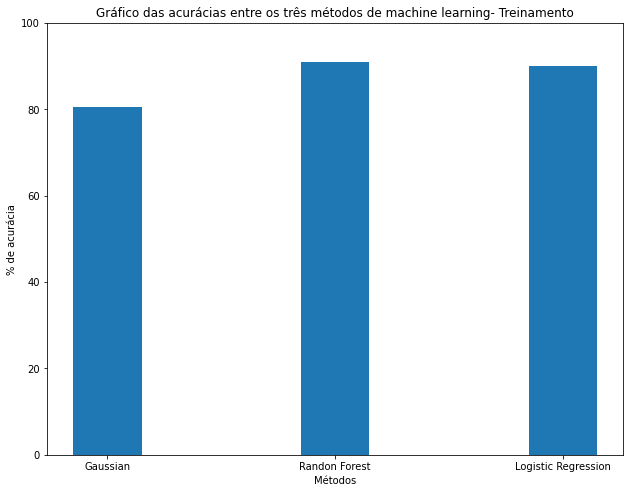

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Gráfico das acurácias entre os três métodos de machine learning- Treinamento')
ax.set_ylabel('% de acurácia')
ax.set_xlabel('Métodos')
ax.set_ylim(0.0, 100.0)
met = ['Gaussian', 'Randon Forest', 'Logistic Regression']
resul = [acc_GNB*100, acc_RFC*100, acc_LR*100]
ax.bar(met,resul, width=0.30)

plt.show()

Preparando variáveis para gerar gráfico

In [ ]:
acc= [acc_GNB,acc_RFC,acc_LR]
ps= [ps_GNB,ps_RF,ps_LR]
rc= [rc_GNB,rc_RF, rc_LR]
f1_score= [f1_score_GNB, f1_score_RF, f1_score_LR]
labels= ['Gaussian', 'Randon Forest', 'Logist Regression']

### Comparando todas as métricas no mesmo gráfico de forma empilhada

Resultados
                   Acurácia  Precisão  Revocação  F1_Score
Gaussian           0.804474  0.652430   0.684662  0.664883
Randon Forest      0.908865  0.864984   0.759500  0.798650
Logist Regression  0.898923  0.847787   0.729754  0.770432



<Figure size 1080x576 with 0 Axes>

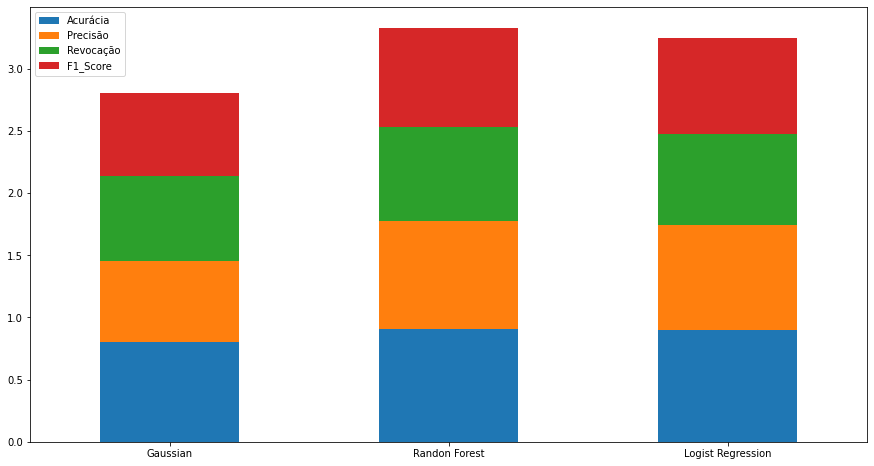

In [ ]:
#Acredito que não seja adequado este gráfico
data_frme = pd.DataFrame({
  "Acurácia": acc,
  "Precisão": ps,
  "Revocação": rc,
  "F1_Score": f1_score,
},
    
  index= (labels),
  
)
print("Resultados")
print(data_frme)
print()
plt.rcParams['figure.figsize'] = (15,8)
plt.savefig("data_frme.png")

data_frme.plot.bar(rot=0, stacked=True)
#plt.grid(b=None)

plt.show()

### Comparando todas as métricas no mesmo gráfico na forma de barra agrupada

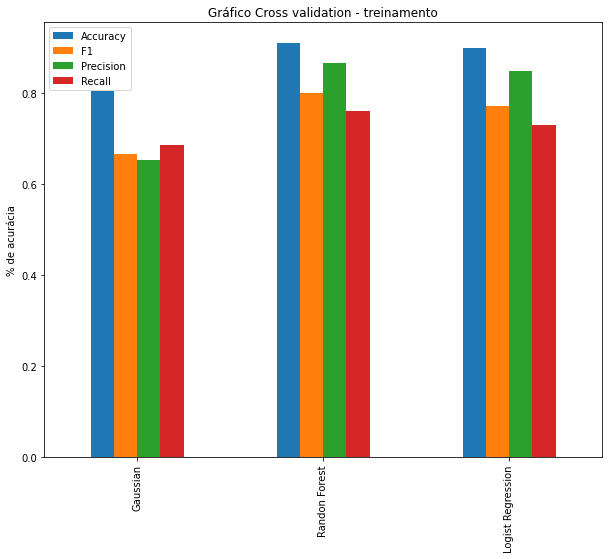

In [ ]:
#Copiei este gráfico do template, não sei se pode. Modifiquei só o nome e um parâmetro pra retirar linha de grade. 
df = pd.DataFrame({"Accuracy": acc
                       ,"F1": f1_score
                       ,"Precision": ps 
                        ,"Recall": rc}  
                       ,index=labels)

ax = df.plot.bar(figsize=(10, 8))
ax.set_ylabel('% de acurácia')
ax.set_title('Gráfico Cross validation - treinamento')
plt.show()



## Qual modelo está performando melhor em 70% da base de dados? O Randon Forest apresenta um maior acurácia, precisão, revocação e F1_Score entre todos os modelos. Agora iremos aplicar no test de 30% que foi separado no início do projeto

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_train)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_test)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Exatidão (Accuracy): 0.9105



In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[102  86]
 [ 22 997]]

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.54      0.65       188
           0       0.92      0.98      0.95      1019

    accuracy                           0.91      1207
   macro avg       0.87      0.76      0.80      1207
weighted avg       0.91      0.91      0.90      1207



In [ ]:
df.shape

(3, 4)

In [ ]:
df_novo.isna().sum()

Idade                     0
Raca                      0
Estado Civil              0
Estagio do Tumor          0
Estagio do Nodulo         0
Estagio do cancer         0
Diferenciar               0
Grau                      0
Localizacao               0
Tamanho do tumor          0
Status do Estrogenio      0
Status da Progesterona    0
No regional examidado     0
No Reginoal Positivo      0
Meses de Sobrevivencia    0
Status                    0
dtype: int64

In [ ]:
columns =['Idade','Raca','Estado Civil','Estagio do Tumor','Estagio do Nodulo','Estagio do cancer','Diferenciar','Grau','Localizacao','Tamanho do tumor','Status do Estrogenio','Status da Progesterona','No regional examidado','No Reginoal Positivo','Meses de Sobrevivencia','Status']

In [ ]:
x = df_novo.drop(columns='Status')
y = df_novo['Status']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x, y , test_size = 0.3 , random_state =157)

In [ ]:
modelo = RandomForestClassifier(n_estimators= 100,n_jobs=1,random_state=0)

In [ ]:
modelo.fit(x_train,y_train)

RandomForestClassifier(n_jobs=1, random_state=0)

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score,
print('Acuracia:', accuracy_score ( y_test, y_pred)*100)

Acuracia: 91.21789560894781


In [ ]:
RandomForest(x_train,y_train,x_test)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1019
         1.0       0.83      0.55      0.66       188

    accuracy                           0.91      1207
   macro avg       0.88      0.77      0.81      1207
weighted avg       0.91      0.91      0.91      1207

